# Importing necessary libraries 

In [1]:
import os 
os.chdir('D:\Semester 4')
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_excel('Dataset_Question2.xlsx')

In [112]:
train.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,1
1,693.39,24.66,133.18,3138.96,0.3785,1
2,523.10,23.23,146.55,1058.24,0.4799,0
3,612.86,40.97,94.44,1325.12,0.3147,0
4,500.28,37.44,185.48,2474.51,0.2284,1


In [3]:
X = train.drop(columns = ['Test'])
y = train['Test']

# Encoding the Categorical Feature

In [4]:
for i in np.arange(0 , 1000):
    if(train.loc[i , 'Test'] == "Pass"):
        train.loc[i , 'Test'] = 1
    elif(train.loc[i , 'Test'] == "Fail"):
        train.loc[i  , 'Test'] = 0

In [5]:
y[999] = 0
y = np.array(y)
y.shape = [1000 , 1]
y = y.astype('float64')

D:\Anaconda Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Describing the data

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Temperature                     1000 non-null float64
Pressure                        1000 non-null float64
Feed Flow rate                  1000 non-null float64
Coolant Flow rate               1000 non-null float64
Inlet reactant concentration    1000 non-null float64
Test                            1000 non-null object
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


# Correlation of the features of the dataset

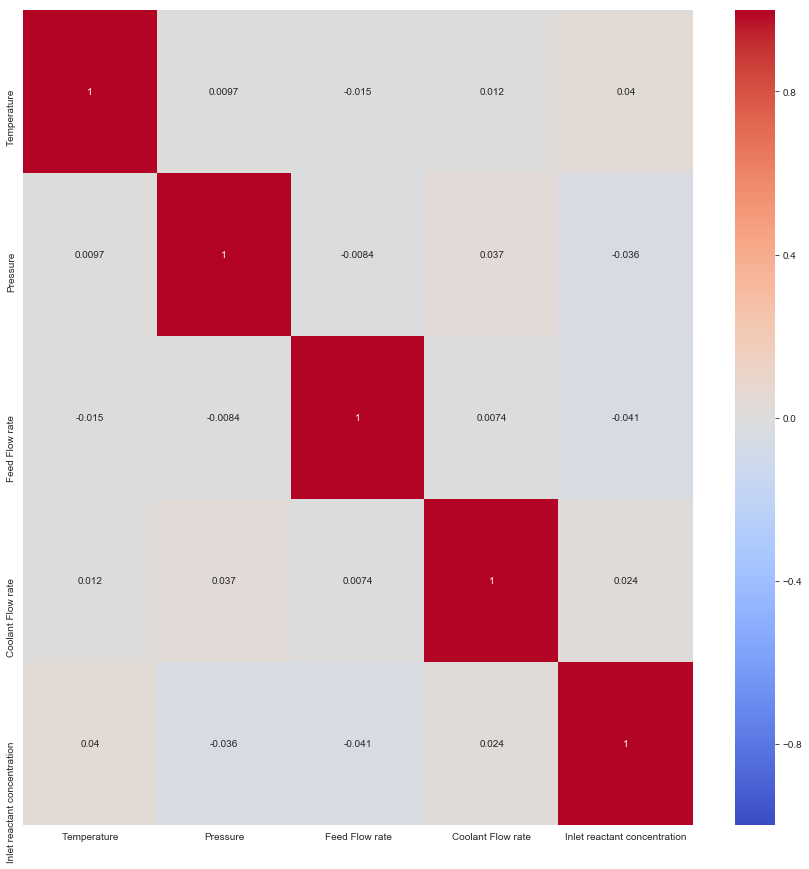

In [111]:
fig , axes = plt.subplots(figsize = (15 , 15))
axes = sns.heatmap(train.corr() , annot = True , vmin = -1 , vmax = +1 , center = 0 , cmap ='coolwarm' , linecolor = 'black',
           fmt = '0.2g')

# A bird eye's view of the correlation of the features

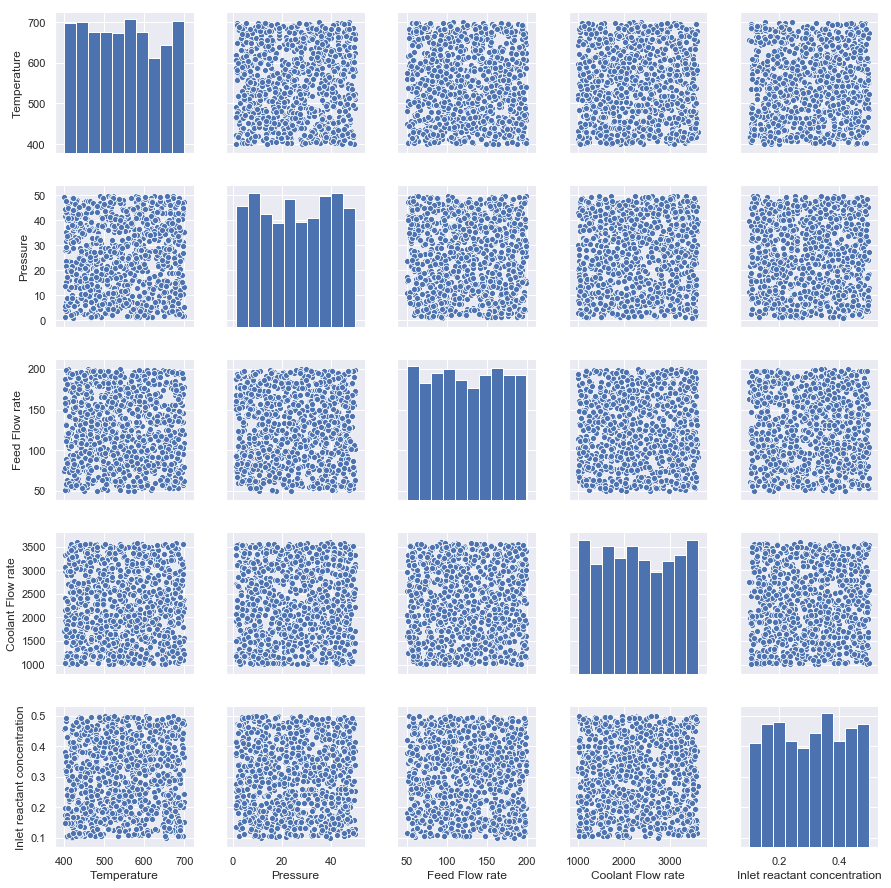

In [113]:
sns.set()
cols = ['Temperature', 'Pressure', 'Feed Flow rate', 'Coolant Flow rate', 'Inlet reactant concentration']
sns.pairplot(train[cols], height = 2.5)
plt.show()

There is no linear correlation between any of the variables. The model can then be expected to better

# Distribution of the examples in the variables in the dataset

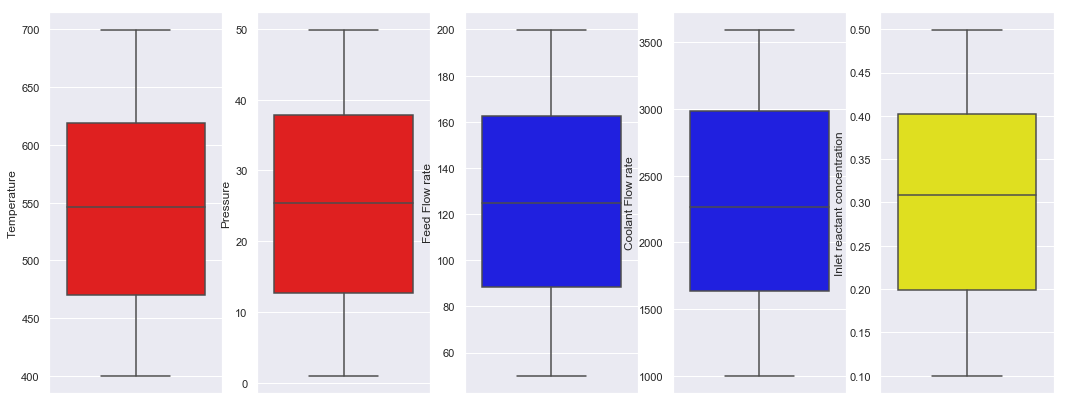

In [155]:
fig , axes = plt.subplots(1,5,figsize = (18 , 7))
sns.boxplot( y = 'Temperature' , data = train , color ='red' , ax = axes[0] )
sns.boxplot( y = 'Pressure' , data = train , color ='red' , ax = axes[1] )
sns.boxplot( y = 'Feed Flow rate' , data = train , color ='blue' , ax = axes[2] )
sns.boxplot( y = 'Coolant Flow rate' , data = train , color ='blue' , ax = axes[3] )
sns.boxplot( y = 'Inlet reactant concentration' , data = train , color ='yellow' , ax = axes[4] )

# Splitting the data given

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 38)

# Defining the functions

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [9]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
    return (cost_history, params)

In [10]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

# Attempt -1

Initial Cost is:           0
0  4.786082 

Optimal Parameters are: 
                                        0
Temperature                   -66.216046
Pressure                      -39.153062
Feed Flow rate               -123.265490
Coolant Flow rate              32.818227
Inlet reactant concentration   -0.150048 



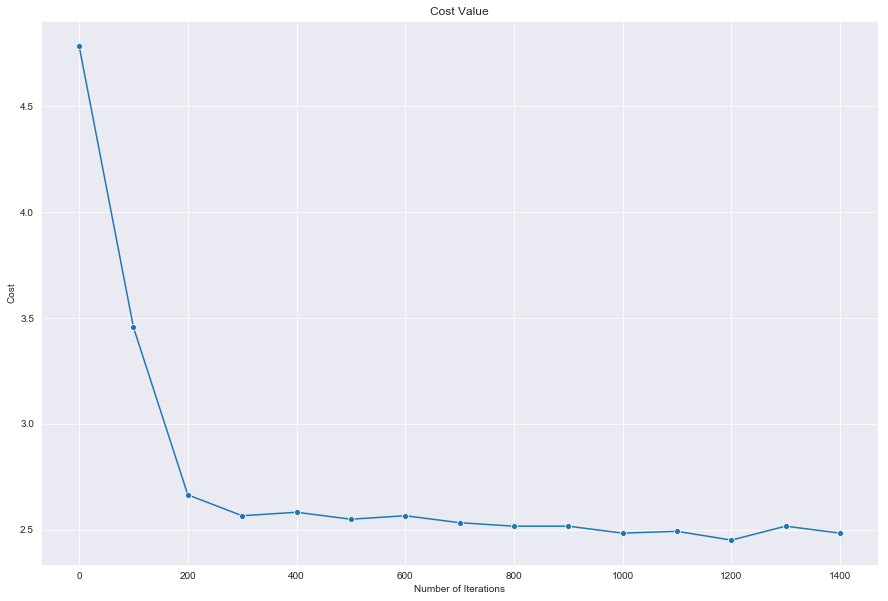

In [90]:
n = 5
params = np.array((600,25,100,2000,0.4) , dtype = 'float64').reshape(5 , 1)

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

#fig , axes = plt.subplots(1,1,figsize = (16,7))
cost

f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,1500 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt -2

Initial Cost is:           0
0  4.786082 

Optimal Parameters are: 
                                       0
Temperature                   -6.359563
Pressure                     -20.557456
Feed Flow rate               -14.442842
Coolant Flow rate              2.383257
Inlet reactant concentration  -0.099378 



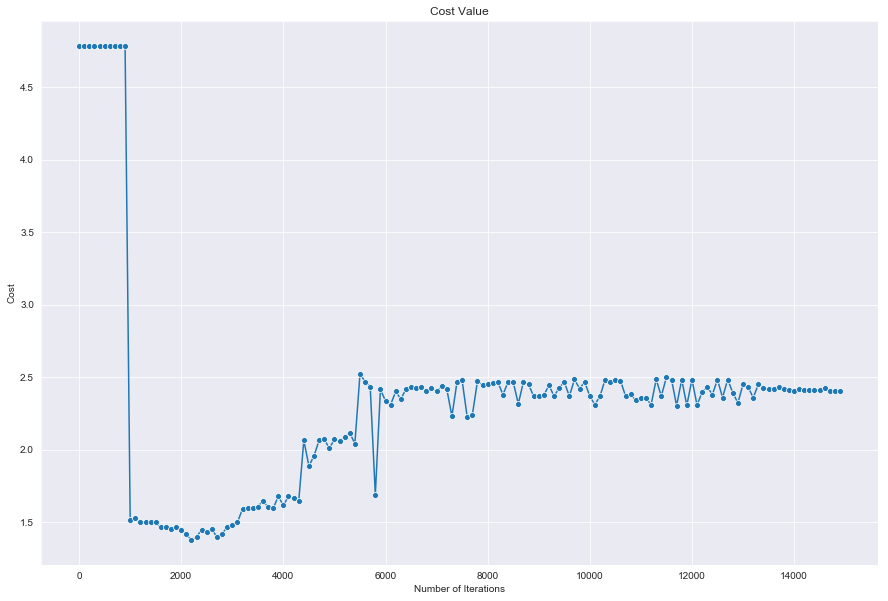

In [91]:
n = 5
params = np.array((600,25,100,2000,0.4) , dtype = 'float64').reshape(5 , 1)

iterations = 15000
learning_rate = 0.003

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

#fig , axes = plt.subplots(1,1,figsize = (16,7))
cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,15000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt - 3

Initial Cost is:           0
0  4.786082 

Optimal Parameters are: 
                                       0
Temperature                   -3.692176
Pressure                     -10.327674
Feed Flow rate               -30.373017
Coolant Flow rate              2.903096
Inlet reactant concentration   0.021638 



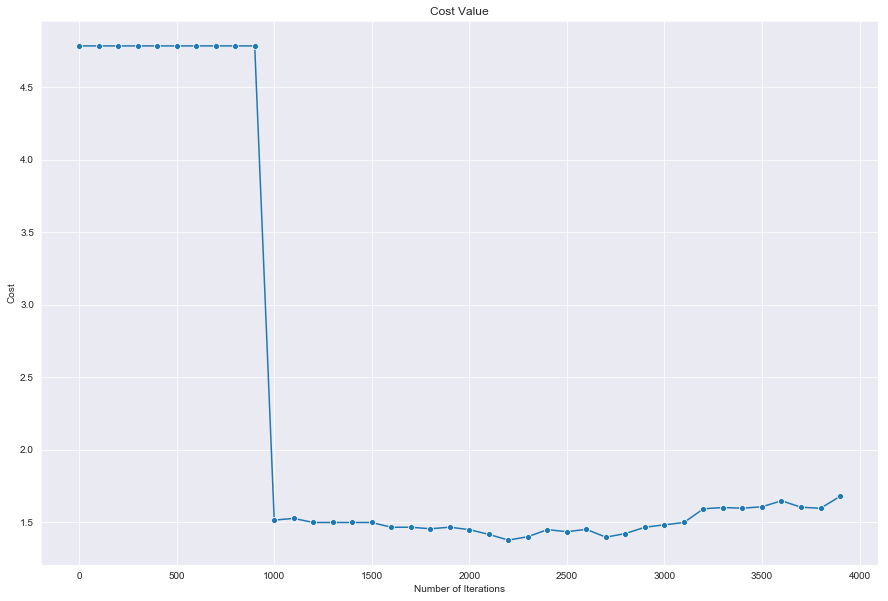

In [92]:
n = 5
params = np.array((600,25,100,2000,0.4) , dtype = 'float64').reshape(5 , 1)

iterations = 4000
learning_rate = 0.003

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,4000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt - 4

Initial Cost is:           0
0  4.786082 

Optimal Parameters are: 
                                       0
Temperature                   -3.285048
Pressure                     -32.603696
Feed Flow rate               -31.674999
Coolant Flow rate              3.240156
Inlet reactant concentration   0.025118 



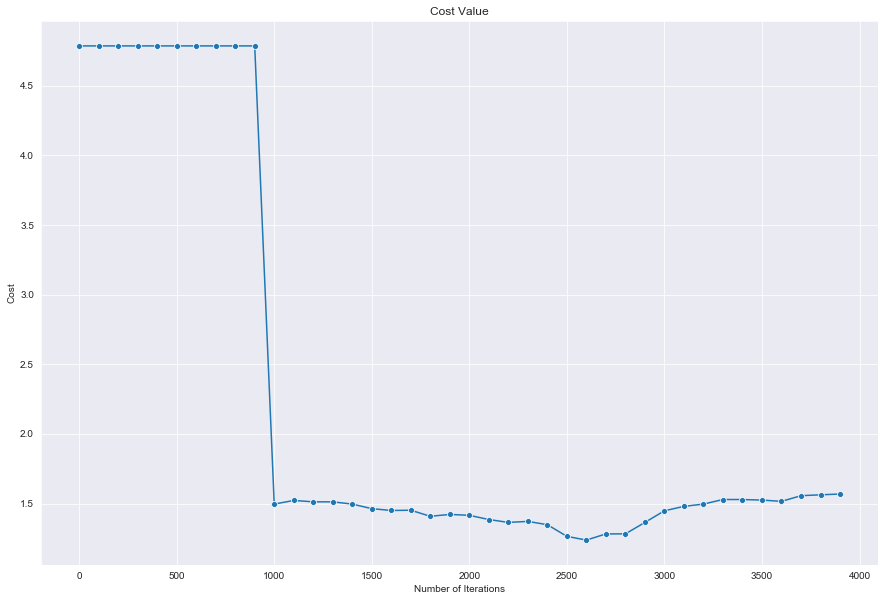

In [93]:
n = 5
params = np.array((600,0,100,2000,0.4) , dtype = 'float64').reshape(5 , 1)

iterations = 4000
learning_rate = 0.003

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,4000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt-5

Initial Cost is:           0
0  5.935269 

Optimal Parameters are: 
                                        0
Temperature                   -62.065419
Pressure                      -80.336991
Feed Flow rate               -139.405017
Coolant Flow rate              33.916876
Inlet reactant concentration   -1.121127 



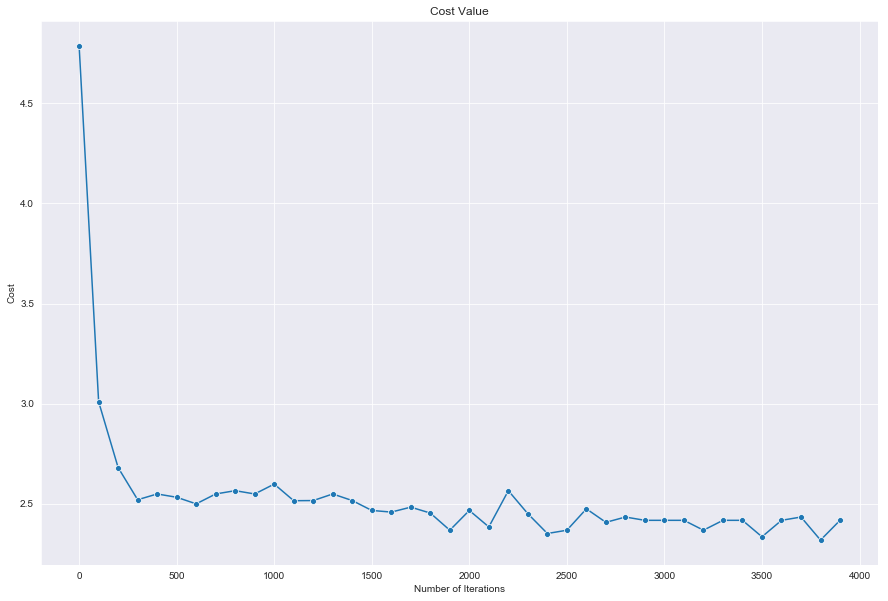

In [97]:
n = 5
params = np.array((-0.005,-0.03,-0.20,0.004,-0.6) , dtype = 'float64').reshape(5 , 1)

iterations = 4000
learning_rate = 0.03

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,4000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt - 6

Initial Cost is:           0
0  5.935269 

Optimal Parameters are: 
                                         0
Temperature                   -653.069779
Pressure                      -804.270414
Feed Flow rate               -1400.794649
Coolant Flow rate              222.517807
Inlet reactant concentration    -5.830963 



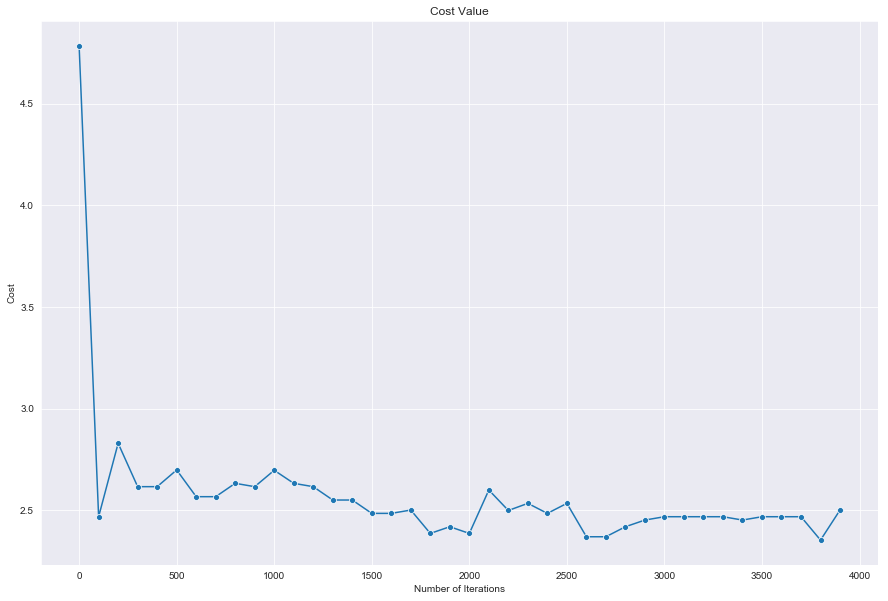

In [98]:
n = 5
params = np.array((-0.005,-0.03,-0.20,0.004,-0.6) , dtype = 'float64').reshape(5 , 1)

iterations = 4000
learning_rate = 0.3

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,4000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt - 7

Initial Cost is:           0
0  5.935269 

Optimal Parameters are: 
                                       0
Temperature                   -6.522409
Pressure                      -8.084763
Feed Flow rate               -14.008323
Coolant Flow rate              2.221334
Inlet reactant concentration  -0.652328 



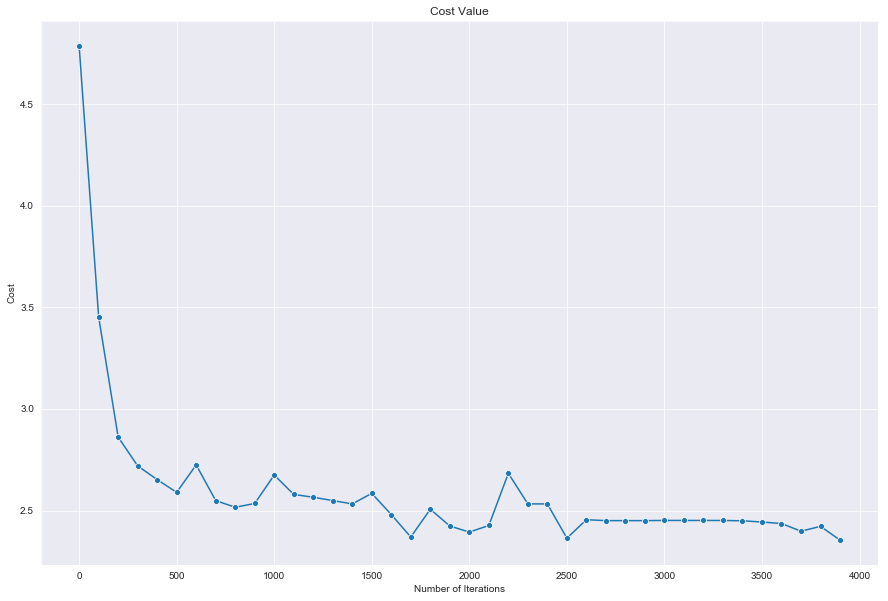

In [95]:
n = 5
params = np.array((-0.005,-0.03,-0.20,0.004,-0.6) , dtype = 'float64').reshape(5 , 1)

iterations = 4000
learning_rate = 0.003

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,4000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

# Attempt - 8

Initial Cost is:           0
0  5.935269 

Optimal Parameters are: 
                                      0
Temperature                  -0.649085
Pressure                     -0.821448
Feed Flow rate               -1.399317
Coolant Flow rate             0.222253
Inlet reactant concentration -0.605153 



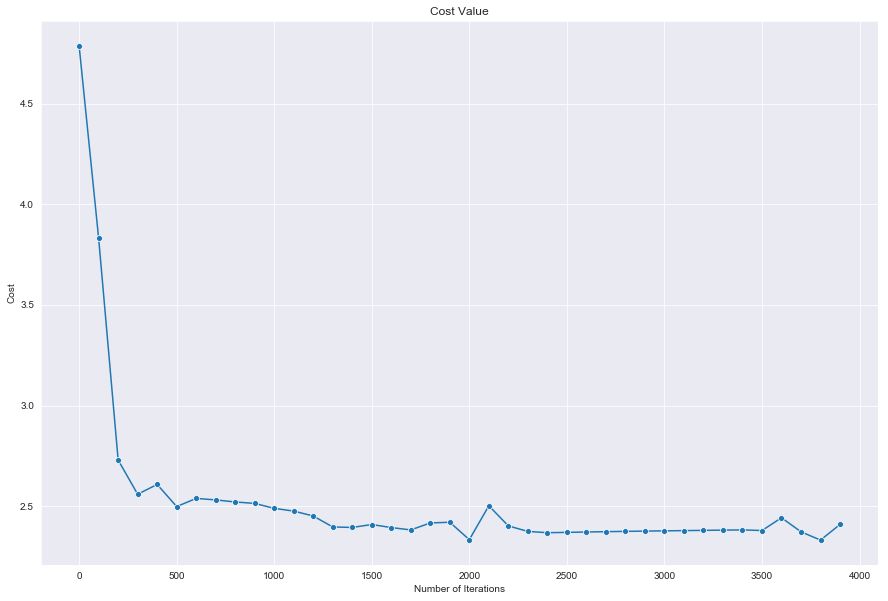

In [99]:
n = 5
params = np.array((-0.005,-0.03,-0.20,0.004,-0.6) , dtype = 'float64').reshape(5 , 1)

iterations = 4000
learning_rate = 0.0003

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,4000 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

We know that we are in the right direction as the cost function value keeps decreasing after very iteration. 

We see that after 2000 iterations it starts increasing again indicating that we might have crossed the global minumum after this.

So we can stop after 2000 iterations and get out parameters for the same in the the next attempt.

# Attempt - 9

Initial Cost is:           0
0  5.935269 

Optimal Parameters are: 
                                      0
Temperature                  -0.669919
Pressure                     -0.500202
Feed Flow rate               -1.288645
Coolant Flow rate             0.217104
Inlet reactant concentration -0.602902 



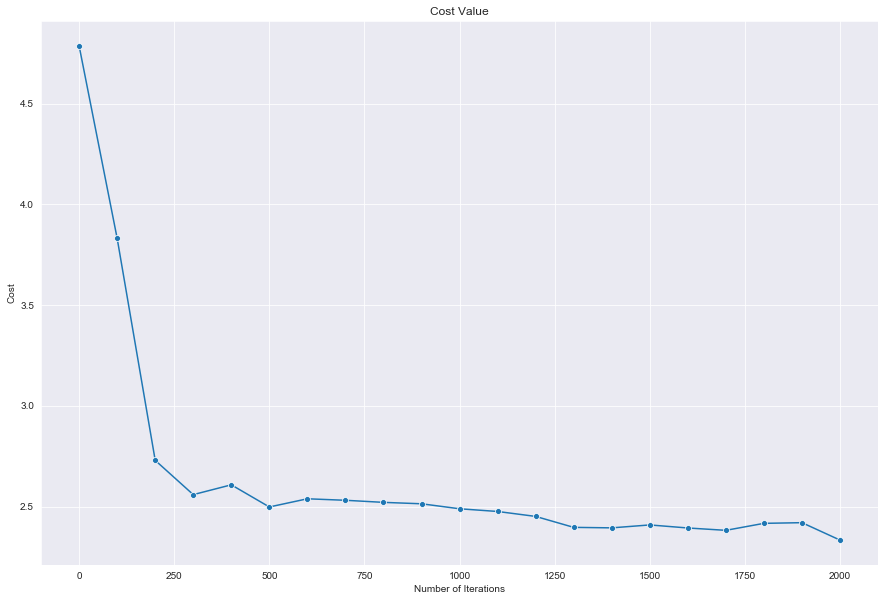

In [100]:
n = 5
params = np.array((-0.005,-0.03,-0.20,0.004,-0.6) , dtype = 'float64').reshape(5 , 1)

iterations = 2010
learning_rate = 0.0003

initial_cost = compute_cost(X_train, y_train, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_train, y_train, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

cost= []
for i in np.arange((len(cost_history))):
    if(i%100 == 0):
        cost.append(cost_history[i][0])
#cost_history[0][0]
cost = pd.Series(cost)

cost
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(1, 1)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.lineplot(x = np.arange(0 ,2010 , 100 ) , y = cost , linestyle = '--' , marker = 'o')
    plt.title("Cost Value")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")

In [101]:
coef = np.array([-0.669919,-0.500202, -1.288645 , 0.217104 ,  -0.602902] , dtype = 'float64').reshape(5 , 1)
params_optimal = coef

In [104]:
preds1 = []
def model(theta ,epsilon , X_test):
    z = epsilon + X_test @ params_optimal
    zsig = sigmoid(z)
    #zsig = pd.Series(zsig)
    for i in np.arange(0 , X_test.shape[0]):
        if(zsig.values[i][0] >= 0.5):
            preds1.append(1)
        elif(zsig.values[i][0] < 0.5):
            preds1.append(0)
    return preds1

In [105]:
preds1 = model(params_optimal, 1e-5 , X_test)
preds1 = pd.Series(preds1)
preds1

0      0
1      0
2      1
3      0
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     1
19     1
20     1
21     0
22     0
23     0
24     1
25     1
26     0
27     1
28     0
29     0
      ..
270    0
271    0
272    1
273    0
274    1
275    0
276    1
277    0
278    0
279    0
280    1
281    0
282    1
283    1
284    0
285    0
286    0
287    1
288    1
289    1
290    1
291    0
292    1
293    1
294    0
295    0
296    0
297    0
298    1
299    0
Length: 300, dtype: int64

# Confusion Matrix to get better insights into whether the model is overfitting or not

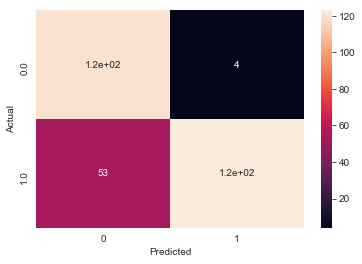

In [106]:
confusion_matrix = pd.crosstab(np.array(y_test).reshape(300 ,), np.array(preds1).reshape(300 ,), rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [107]:
confusion_matrix

Predicted,0,1
Actual,,
0.0,120,4
1.0,53,123


# F1 Score is 0.81 indicating a good model

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81       124
         1.0       0.97      0.70      0.81       176

    accuracy                           0.81       300
   macro avg       0.83      0.83      0.81       300
weighted avg       0.85      0.81      0.81       300

